# TASK-3

In [1]:
pip install pandas scikit-learn matplotlib seaborn 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
MAE: 0.5332001304956558
MSE: 0.555891598695244
RMSE: 0.7455813830127761
R² Score: 0.5757877060324511
Intercept: -37.023277706064064
            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


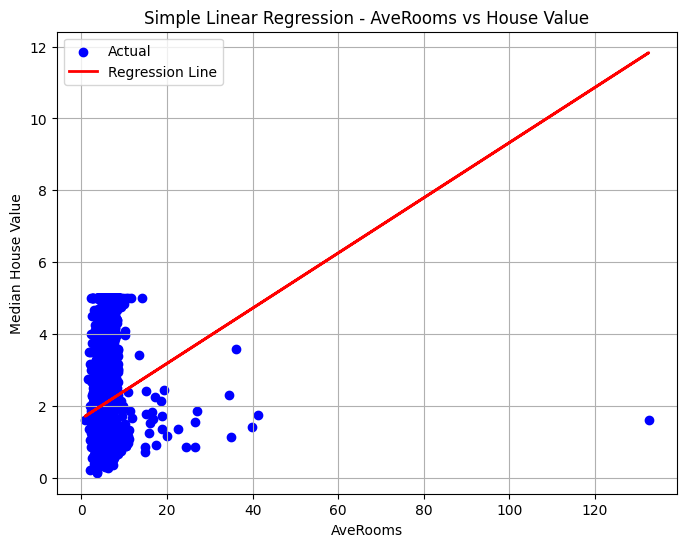

In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Preview data
print(df.head())

# Features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Coefficients
print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

# Simple regression for AveRooms
feature = 'AveRooms'

X_feature = df[[feature]]
y_target = df['MedHouseVal']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_target, test_size=0.2, random_state=42)

model_f = LinearRegression()
model_f.fit(X_train_f, y_train_f)
y_pred_f = model_f.predict(X_test_f)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test_f, y_test_f, color='blue', label='Actual')
plt.plot(X_test_f, y_pred_f, color='red', linewidth=2, label='Regression Line')
plt.xlabel(feature)
plt.ylabel("Median House Value")
plt.title(f"Simple Linear Regression - {feature} vs House Value")
plt.legend()
plt.grid(True)
plt.show()
